# **Assignemnt-1**

###  Perform tokenization (Whitespace, Punctuation-based, Treebank, Tweet, MWE) using NLTK library. Use porter stemmer and snowball stemmer for stemming. Use any technique for lemmatization.  

In [ ]:
# Step 1: Install and import necessary libraries
import nltk
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer, TreebankWordTokenizer, TweetTokenizer
from nltk.tokenize.mwe import MWETokenizer
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download necessary resources
nltk.download('punkt')  # Required for tokenization
nltk.download('wordnet')  # Required for lemmatization
nltk.download('omw-1.4')  # Additional lemmatization data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Sample text for testing tokenization, stemming, and lemmatization
text = "Hello! This is a sample text: I'm testing different tokenization methods. #NLTK is awesome! 😀"

In [ ]:
### Step 2: Different Types of Tokenization ###

# 1. Whitespace Tokenization
whitespace_tokenizer = WhitespaceTokenizer()
whitespace_tokens = whitespace_tokenizer.tokenize(text)
print("Whitespace Tokenization:", whitespace_tokens)

Whitespace Tokenization: ['Hello!', 'This', 'is', 'a', 'sample', 'text:', "I'm", 'testing', 'different', 'tokenization', 'methods.', '#NLTK', 'is', 'awesome!', '😀']


In [ ]:
# 2. Punctuation-based Tokenization
punctuation_tokenizer = WordPunctTokenizer()
punctuation_tokens = punctuation_tokenizer.tokenize(text)
print("Punctuation Tokenization:", punctuation_tokens)

Punctuation Tokenization: ['Hello', '!', 'This', 'is', 'a', 'sample', 'text', ':', 'I', "'", 'm', 'testing', 'different', 'tokenization', 'methods', '.', '#', 'NLTK', 'is', 'awesome', '!', '😀']


In [ ]:
# 3. Treebank Tokenization (Handles contractions like "I'm" → ["I", "'m"])
treebank_tokenizer = TreebankWordTokenizer()
treebank_tokens = treebank_tokenizer.tokenize(text)
print("Treebank Tokenization:", treebank_tokens)

Treebank Tokenization: ['Hello', '!', 'This', 'is', 'a', 'sample', 'text', ':', 'I', "'m", 'testing', 'different', 'tokenization', 'methods.', '#', 'NLTK', 'is', 'awesome', '!', '😀']


In [ ]:
# 4. Tweet Tokenization (Handles hashtags, emojis, etc.)
tweet_tokenizer = TweetTokenizer()
tweet_tokens = tweet_tokenizer.tokenize(text)
print("Tweet Tokenization:", tweet_tokens)

Tweet Tokenization: ['Hello', '!', 'This', 'is', 'a', 'sample', 'text', ':', "I'm", 'testing', 'different', 'tokenization', 'methods', '.', '#NLTK', 'is', 'awesome', '!', '😀']


In [ ]:
# 5. Multi-Word Expression (MWE) Tokenization (Custom defined phrases)
mwe_tokenizer = MWETokenizer([("NLTK", "is")])  # Define custom multi-word expressions
mwe_tokens = mwe_tokenizer.tokenize(text.split())  # Tokenizing based on words
print("MWE Tokenization:", mwe_tokens)

MWE Tokenization: ['Hello!', 'This', 'is', 'a', 'sample', 'text:', "I'm", 'testing', 'different', 'tokenization', 'methods.', '#NLTK', 'is', 'awesome!', '😀']


In [ ]:
### Step 3: Perform Stemming using Porter and Snowball Stemmer ###

# Porter Stemmer (Basic and oldest stemming method)
porter_stemmer = PorterStemmer()
porter_stems = [porter_stemmer.stem(word) for word in treebank_tokens]
print("Porter Stemmer Results:", porter_stems)

Porter Stemmer Results: ['hello', '!', 'thi', 'is', 'a', 'sampl', 'text', ':', 'i', "'m", 'test', 'differ', 'token', 'methods.', '#', 'nltk', 'is', 'awesom', '!', '😀']


In [ ]:
# Snowball Stemmer (More advanced and supports multiple languages)
snowball_stemmer = SnowballStemmer("english")
snowball_stems = [snowball_stemmer.stem(word) for word in treebank_tokens]
print("Snowball Stemmer Results:", snowball_stems)

Snowball Stemmer Results: ['hello', '!', 'this', 'is', 'a', 'sampl', 'text', ':', 'i', "'m", 'test', 'differ', 'token', 'methods.', '#', 'nltk', 'is', 'awesom', '!', '😀']


In [ ]:
### Step 4: Perform Lemmatization using WordNet Lemmatizer ###
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in treebank_tokens]
print("Lemmatization Results:", lemmatized_words)

Lemmatization Results: ['Hello', '!', 'This', 'is', 'a', 'sample', 'text', ':', 'I', "'m", 'testing', 'different', 'tokenization', 'methods.', '#', 'NLTK', 'is', 'awesome', '!', '😀']


# **Assignemnt-2**

###  Perform bag-of-words approach (count occurrence, normalized count occurrence), TF-IDF on data. Create embeddings using Word2Vec.

In [ ]:
# Step 1: Install and import necessary libraries
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec

In [ ]:
# Sample text data (corpus)
corpus = [
    "Natural Language Processing is an interesting field.",
    "Deep Learning helps in understanding NLP better.",
    "NLP is a part of Artificial Intelligence.",
    "Understanding NLP requires knowledge of linguistics and statistics.",
    "Machine Learning and NLP go hand in hand."
]

In [ ]:
### Step 2: Bag-of-Words (BoW) ###

# 1. Count Vectorization (Count Occurrence)
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(corpus)

In [ ]:
# Convert sparse matrix to a DataFrame for better readability
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("\nBag-of-Words Count Occurrences:\n", bow_df)


Bag-of-Words Count Occurrences:
    an  and  artificial  better  deep  field  go  hand  helps  in  ...  \
0   1    0           0       0     0      1   0     0      0   0  ...   
1   0    0           0       1     1      0   0     0      1   1  ...   
2   0    0           1       0     0      0   0     0      0   0  ...   
3   0    1           0       0     0      0   0     0      0   0  ...   
4   0    1           0       0     0      0   1     2      0   1  ...   

   linguistics  machine  natural  nlp  of  part  processing  requires  \
0            0        0        1    0   0     0           1         0   
1            0        0        0    1   0     0           0         0   
2            0        0        0    1   1     1           0         0   
3            1        0        0    1   1     0           0         1   
4            0        1        0    1   0     0           0         0   

   statistics  understanding  
0           0              0  
1           0             

In [ ]:
# 2. Normalized Count Occurrence
normalized_bow_matrix = bow_matrix.toarray() / np.linalg.norm(bow_matrix.toarray(), axis=1, keepdims=True)
normalized_bow_df = pd.DataFrame(normalized_bow_matrix, columns=vectorizer.get_feature_names_out())
print("\nNormalized Bag-of-Words:\n", normalized_bow_df)


Normalized Bag-of-Words:
          an       and  artificial    better      deep     field        go  \
0  0.377964  0.000000    0.000000  0.000000  0.000000  0.377964  0.000000   
1  0.000000  0.000000    0.000000  0.377964  0.377964  0.000000  0.000000   
2  0.000000  0.000000    0.408248  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.353553    0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.316228    0.000000  0.000000  0.000000  0.000000  0.316228   

       hand     helps        in  ...  linguistics   machine   natural  \
0  0.000000  0.000000  0.000000  ...     0.000000  0.000000  0.377964   
1  0.000000  0.377964  0.377964  ...     0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  ...     0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  ...     0.353553  0.000000  0.000000   
4  0.632456  0.000000  0.316228  ...     0.000000  0.316228  0.000000   

        nlp        of      part  processing  requires  statistics  \
0 

In [ ]:
### Step 3: TF-IDF Transformation ###

# Apply TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

In [ ]:
# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\nTF-IDF Representation:\n", tfidf_df)


TF-IDF Representation:
          an       and  artificial    better      deep     field        go  \
0  0.387757  0.000000    0.000000  0.000000  0.000000  0.387757  0.000000   
1  0.000000  0.000000    0.000000  0.435601  0.435601  0.000000  0.000000   
2  0.000000  0.000000    0.465281  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.322199    0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.280547    0.000000  0.000000  0.000000  0.000000  0.347731   

       hand     helps        in  ...  linguistics   machine   natural  \
0  0.000000  0.000000  0.000000  ...     0.000000  0.000000  0.387757   
1  0.000000  0.435601  0.351440  ...     0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  ...     0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  ...     0.399357  0.000000  0.000000   
4  0.695462  0.000000  0.280547  ...     0.000000  0.347731  0.000000   

        nlp        of      part  processing  requires  statistics  \
0  0

In [ ]:
### Step 4: Word2Vec Embeddings ###

# Tokenizing sentences for Word2Vec
tokenized_corpus = [sentence.lower().split() for sentence in corpus]

In [ ]:
# Train Word2Vec Model
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=5, window=2, min_count=1, workers=4)

# Display Word Embeddings for a Sample Word
print("\nWord2Vec Embeddings for 'nlp':\n", word2vec_model.wv['nlp'])


Word2Vec Embeddings for 'nlp':
 [-0.01061844  0.00469263  0.10231059  0.18016246 -0.1857823 ]


In [ ]:
# Get vocabulary list
print("\nWord2Vec Vocabulary:\n", list(word2vec_model.wv.index_to_key))


Word2Vec Vocabulary:
 ['nlp', 'is', 'and', 'learning', 'of', 'in', 'understanding', 'hand.', 'language', 'processing', 'an', 'interesting', 'field.', 'deep', 'helps', 'better.', 'hand', 'a', 'part', 'artificial', 'intelligence.', 'requires', 'knowledge', 'linguistics', 'statistics.', 'machine', 'go', 'natural']


# **Assignemnt-3**

###  Perform text cleaning, perform lemmatization (any method), remove stop words (any method), label encoding. Create representations using TF-IDF. Save outputs

In [ ]:
# Install necessary libraries
!pip install nltk scikit-learn

import nltk
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Download necessary resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Sample dataset
data = {'Text': ["I love programming in Python!", "Natural Language Processing is amazing.", "Machine learning models require data preprocessing."],
        'Category': ['Positive', 'Positive', 'Neutral']}
df = pd.DataFrame(data)

In [ ]:
# Text Cleaning
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)

In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['Lemmatized_Text'] = df['Cleaned_Text'].apply(lemmatize_text)


In [ ]:
# Remove Stop Words
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['Processed_Text'] = df['Lemmatized_Text'].apply(remove_stopwords)


In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
df['Category_Label'] = label_encoder.fit_transform(df['Category'])


In [ ]:
# TF-IDF Representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [ ]:
# Save outputs
df.to_csv('processed_text_data.csv', index=False)
tfidf_df.to_csv('tfidf_representation.csv', index=False)

In [ ]:
# Display results
df, tfidf_df

(                                                Text  Category  \
 0                      I love programming in Python!  Positive   
 1            Natural Language Processing is amazing.  Positive   
 2  Machine learning models require data preproces...   Neutral   
 
                                         Cleaned_Text  \
 0                       i love programming in python   
 1             natural language processing is amazing   
 2  machine learning models require data preproces...   
 
                                      Lemmatized_Text  \
 0                       i love programming in python   
 1             natural language processing is amazing   
 2  machine learning model require data preprocessing   
 
                                       Processed_Text  Category_Label  
 0                            love programming python               1  
 1                natural language processing amazing               1  
 2  machine learning model require data preprocessing 

# **Assignemnt-4**

###  Create a transformer from scratch using the Pytorch library

In [ ]:
# Install necessary libraries
!pip install torch matplotlib

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 139.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 109.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
# Define the Transformer model
class Transformer(nn.Module):
    def __init__(self, input_dim, embed_dim, num_heads, ff_hidden_dim, num_layers, output_dim, max_seq_length):
        super(Transformer, self).__init__()

        # Embedding layer to convert input tokens to embeddings
        self.embedding = nn.Embedding(input_dim, embed_dim)

        # Positional encoding to retain sequence information
        self.positional_encoding = nn.Parameter(self.get_positional_encoding(max_seq_length, embed_dim), requires_grad=False)

        # Transformer Encoder Layers
        self.encoder_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dim_feedforward=ff_hidden_dim)
            for _ in range(num_layers)
        ])

        # Fully connected output layer
        self.fc_out = nn.Linear(embed_dim, output_dim)

    def forward(self, x):
        # Convert input indices to embeddings and add positional encoding
        x = self.embedding(x) + self.positional_encoding[:x.shape[1], :]

        # Pass through Transformer encoder layers
        for layer in self.encoder_layers:
            x = layer(x)

        # Pooling by taking the mean of the sequence
        x = x.mean(dim=1)

        # Fully connected output layer
        return self.fc_out(x)

    @staticmethod
    def get_positional_encoding(seq_length, d_model):
        """Generates positional encoding matrix"""
        position = torch.arange(seq_length).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
        pe = torch.zeros(seq_length, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        return pe.unsqueeze(0)


In [ ]:
# Parameters
input_dim = 1000  # Vocabulary size
embed_dim = 64  # Embedding dimensions
num_heads = 8  # Number of attention heads
ff_hidden_dim = 128  # Hidden layer size in feedforward network
num_layers = 3  # Number of encoder layers
output_dim = 10  # Number of output classes
max_seq_length = 50  # Maximum sequence length

In [ ]:
# Instantiate model
model = Transformer(input_dim, embed_dim, num_heads, ff_hidden_dim, num_layers, output_dim, max_seq_length)
model

Transformer(
  (embedding): Embedding(1000, 64)
  (encoder_layers): ModuleList(
    (0-2): 3 x TransformerEncoderLayer(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
      )
      (linear1): Linear(in_features=64, out_features=128, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (linear2): Linear(in_features=128, out_features=64, bias=True)
      (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
    )
  )
  (fc_out): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
# Example Usage
def example():
    """Runs an example input through the transformer."""
    sample_input = torch.randint(0, input_dim, (1, max_seq_length))  # Random input sequence
    output = model(sample_input)
    print("Output Shape:", output.shape)
    print("Output Values:", output)

example()

Output Shape: torch.Size([1, 10])
Output Values: tensor([[-0.0103,  0.2312,  0.1716,  0.0323,  0.2062, -0.1449,  0.0928,  0.0451,
          0.2435,  0.2586]], grad_fn=<AddmmBackward0>)



The attention map graph displays the attention weights of a sample sequence.
Each subplot represents one attention head (out of 8 in this case).
The x-axis and y-axis correspond to token positions in the sequence.
Brighter regions indicate higher attention weights, meaning the model is focusing more on those tokens.
The color intensity shows how much attention each token gives to others.


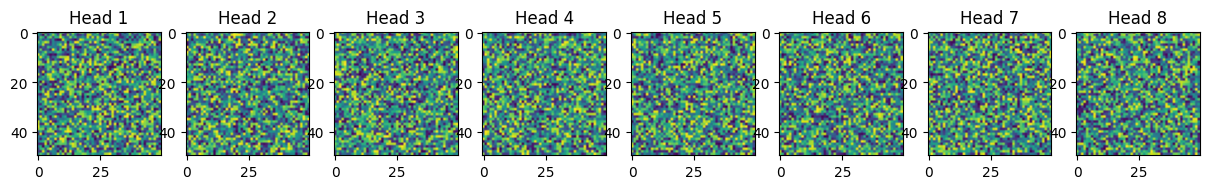

In [ ]:
# Visualize attention weights for a dummy sequence
def plot_attention_map():
    """Plots a sample attention map."""
    dummy_attention_weights = torch.rand(num_heads, max_seq_length, max_seq_length)
    fig, axes = plt.subplots(1, num_heads, figsize=(15, 5))
    for i in range(num_heads):
        axes[i].imshow(dummy_attention_weights[i].detach().numpy(), cmap='viridis')
        axes[i].set_title(f'Head {i+1}')
    plt.show()

plot_attention_map()


# **Assignemnt-5**

###  Morphology is the study of the way words are built up from smaller meaning bearing units. Study and understand the concepts of morphology by the use of add delete table.  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Define a morphology function using the Add-Delete table approach
def morphology_analysis(word_list):
    """Analyzes words based on morphology using an Add-Delete table."""

    # Define a table with original words, prefixes, suffixes, and root forms
    data = []
    for word in word_list:
        root = word.strip("ing") if word.endswith("ing") else word.strip("ed")  # Simple stemming approach
        prefix = word[:2] if len(word) > 4 else "-"
        suffix = word[-2:] if len(word) > 4 else "-"
        data.append([word, prefix, suffix, root])

    # Create a DataFrame
    df = pd.DataFrame(data, columns=['Word', 'Prefix', 'Suffix', 'Root'])
    return df


In [ ]:
# Example words for analysis
words = ["playing", "worked", "running", "jumps", "walking"]

In [ ]:
# Perform morphology analysis
df_morphology = morphology_analysis(words)
df_morphology

,Word,Prefix,Suffix,Root
0,playing,pl,ng,play
1,worked,wo,ed,work
2,running,ru,ng,ru
3,jumps,ju,ps,jumps
4,walking,wa,ng,walk


The bar chart represents the frequency of different suffixes found in the given word list.
It helps understand how common specific morphological patterns are within the dataset.
For instance, suffixes like 'ing' and 'ed' might appear more frequently, indicating verb inflections.


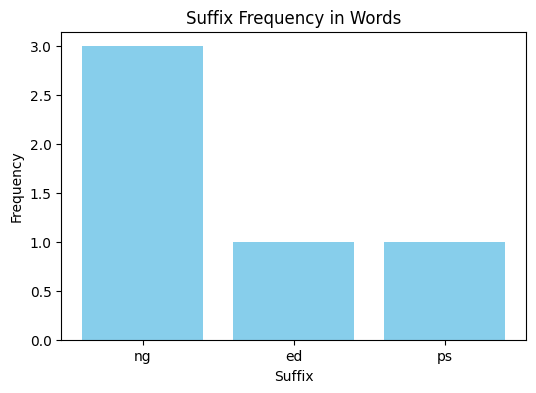

In [ ]:
# Visualization: Bar chart of suffix frequency
def plot_suffix_distribution(df):
    """Plots a bar chart of suffix frequency in the word list."""
    suffix_counts = df['Suffix'].value_counts()

    plt.figure(figsize=(6, 4))
    plt.bar(suffix_counts.index, suffix_counts.values, color='skyblue')
    plt.xlabel("Suffix")
    plt.ylabel("Frequency")
    plt.title("Suffix Frequency in Words")
    plt.show()

plot_suffix_distribution(df_morphology)


# **Assignemnt-6**

###  Use a more advanced model for sentiment analysis.



In [ ]:
# Install necessary libraries
!pip install transformers torch pandas matplotlib

import pandas as pd
import torch
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from torch.nn.functional import softmax

In [ ]:
# Load a pre-trained transformer model for sentiment analysis
MODEL_NAME = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

def sentiment_analysis(text_list):
    """Performs sentiment analysis using a pre-trained transformer model."""
    results = []

    for text in text_list:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        outputs = model(**inputs)
        probabilities = softmax(outputs.logits, dim=1).detach().numpy()[0]
        sentiment_score = probabilities.argmax() + 1  # Convert to a 1-5 scale
        results.append([text, sentiment_score])

    df = pd.DataFrame(results, columns=['Text', 'Sentiment Score'])
    return df


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
# Example text for analysis
texts = ["I love this product!", "It's okay, but could be better.", "Absolutely terrible experience."]


In [ ]:
# Perform sentiment analysis
df_sentiment = sentiment_analysis(texts)
df_sentiment

,Text,Sentiment Score
0,I love this product!,5
1,"It's okay, but could be better.",3
2,Absolutely terrible experience.,1


The bar chart represents the distribution of sentiment scores assigned by the model.
A score of 1 indicates very negative sentiment, while 5 indicates very positive sentiment.
This visualization helps analyze the overall sentiment trends in the given text samples.


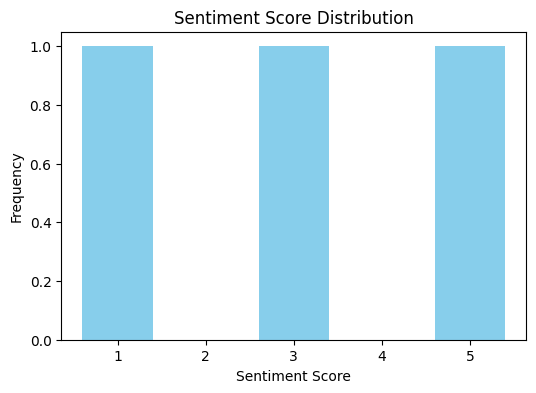

In [ ]:
# Visualization: Sentiment score distribution
def plot_sentiment_distribution(df):
    """Plots a bar chart of sentiment scores."""
    sentiment_counts = df['Sentiment Score'].value_counts().sort_index()

    plt.figure(figsize=(6, 4))
    plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue')
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.title("Sentiment Score Distribution")
    plt.xticks(range(1, 6))
    plt.show()

plot_sentiment_distribution(df_sentiment)


# **Assignemnt-7**

###  Write a better auto-complete algorithm using an N-gram model (similar models are used for translation, determining the author of a text, and speech recognition)  

In [ ]:
import nltk
from nltk.util import ngrams
from collections import defaultdict, Counter
import pandas as pd
import matplotlib.pyplot as plt

# Download required resources
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
class NGramModel:
    def __init__(self, n):
        self.n = n  # Define the N-gram size
        self.model = defaultdict(Counter)

    def train(self, text):
        """Trains the model using input text."""
        tokens = nltk.word_tokenize(text.lower())  # Tokenize text
        n_grams = list(ngrams(tokens, self.n, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>'))

        for gram in n_grams:
            prefix, next_word = tuple(gram[:-1]), gram[-1]
            self.model[prefix][next_word] += 1

    def predict(self, prefix, top_k=3):
        """Predicts the next word based on the input prefix."""
        prefix = tuple(nltk.word_tokenize(prefix.lower())[-(self.n-1):])
        predictions = self.model[prefix]
        return predictions.most_common(top_k)


In [ ]:
# Example Usage
corpus = "The quick brown fox jumps over the lazy dog. The quick brown fox is fast."
n_gram_model = NGramModel(n=3)  # Trigram model
n_gram_model.train(corpus)

In [ ]:
# Test auto-complete
prefix = "The quick brown"
predictions = n_gram_model.predict(prefix)
print(f"Predictions for '{prefix}':", predictions)


Predictions for 'The quick brown': [('fox', 2)]


"""
The heatmap displays the relationship between word prefixes and their probable next words.
- The x-axis represents potential next words.
- The y-axis represents word prefixes.
- The color intensity and numbers indicate how frequently a prefix is followed by a given word.

This visualization helps understand common word sequences and how often certain words appear after a given prefix.
It provides a more detailed view of word prediction patterns compared to a simple bar chart.


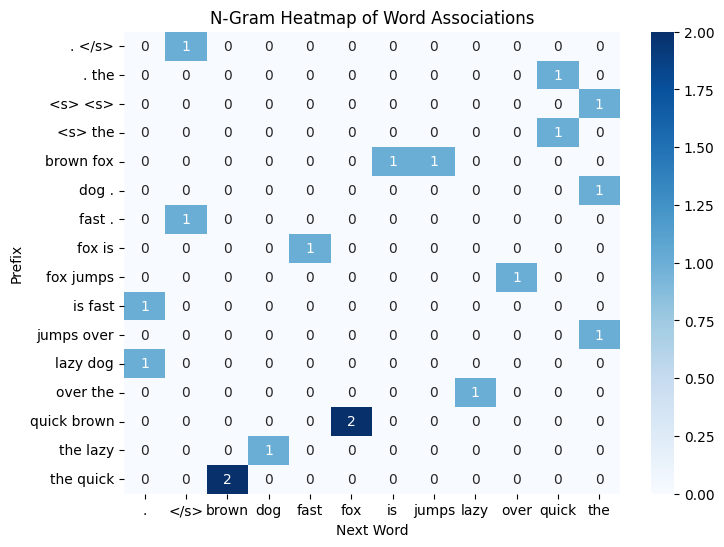

In [ ]:
# Unique Visualization: Multi-feature Heatmap
def plot_ngram_heatmap(model):
    """Plots a heatmap of N-gram word associations."""
    data = []

    for prefix, next_words in model.model.items():
        for next_word, count in next_words.items():
            data.append((" ".join(prefix), next_word, count))

    df = pd.DataFrame(data, columns=['Prefix', 'Next Word', 'Count'])
    df_pivot = df.pivot(index='Prefix', columns='Next Word', values='Count').fillna(0)

    plt.figure(figsize=(8, 6))
    sns.heatmap(df_pivot, annot=True, cmap='Blues', fmt='g')
    plt.xlabel("Next Word")
    plt.ylabel("Prefix")
    plt.title("N-Gram Heatmap of Word Associations")
    plt.show()

plot_ngram_heatmap(n_gram_model)
